In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportion_confint
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.pyplot as plt
sns.set_theme()

In [3]:
df = pd.read_csv("../small_grids.csv")
df.head()

,dims,n,n_clients,percent_censored,n_samples,prob
0,1,16,50,0.0,10,0.966
1,2,16,50,0.0,10,1.000
2,1,32,50,0.0,10,0.216
3,2,32,50,0.0,10,0.090
4,1,64,50,0.0,10,0.050


In [4]:
df["prob_95_conf"] = df.apply(lambda r: proportion_confint(count=500*r['prob'], nobs=500, method="wilson")[0], axis=1)

In [5]:
df["n_clients"].unique()

array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
        600,  650,  700,  750,  800,  850,  900,  950, 1000])

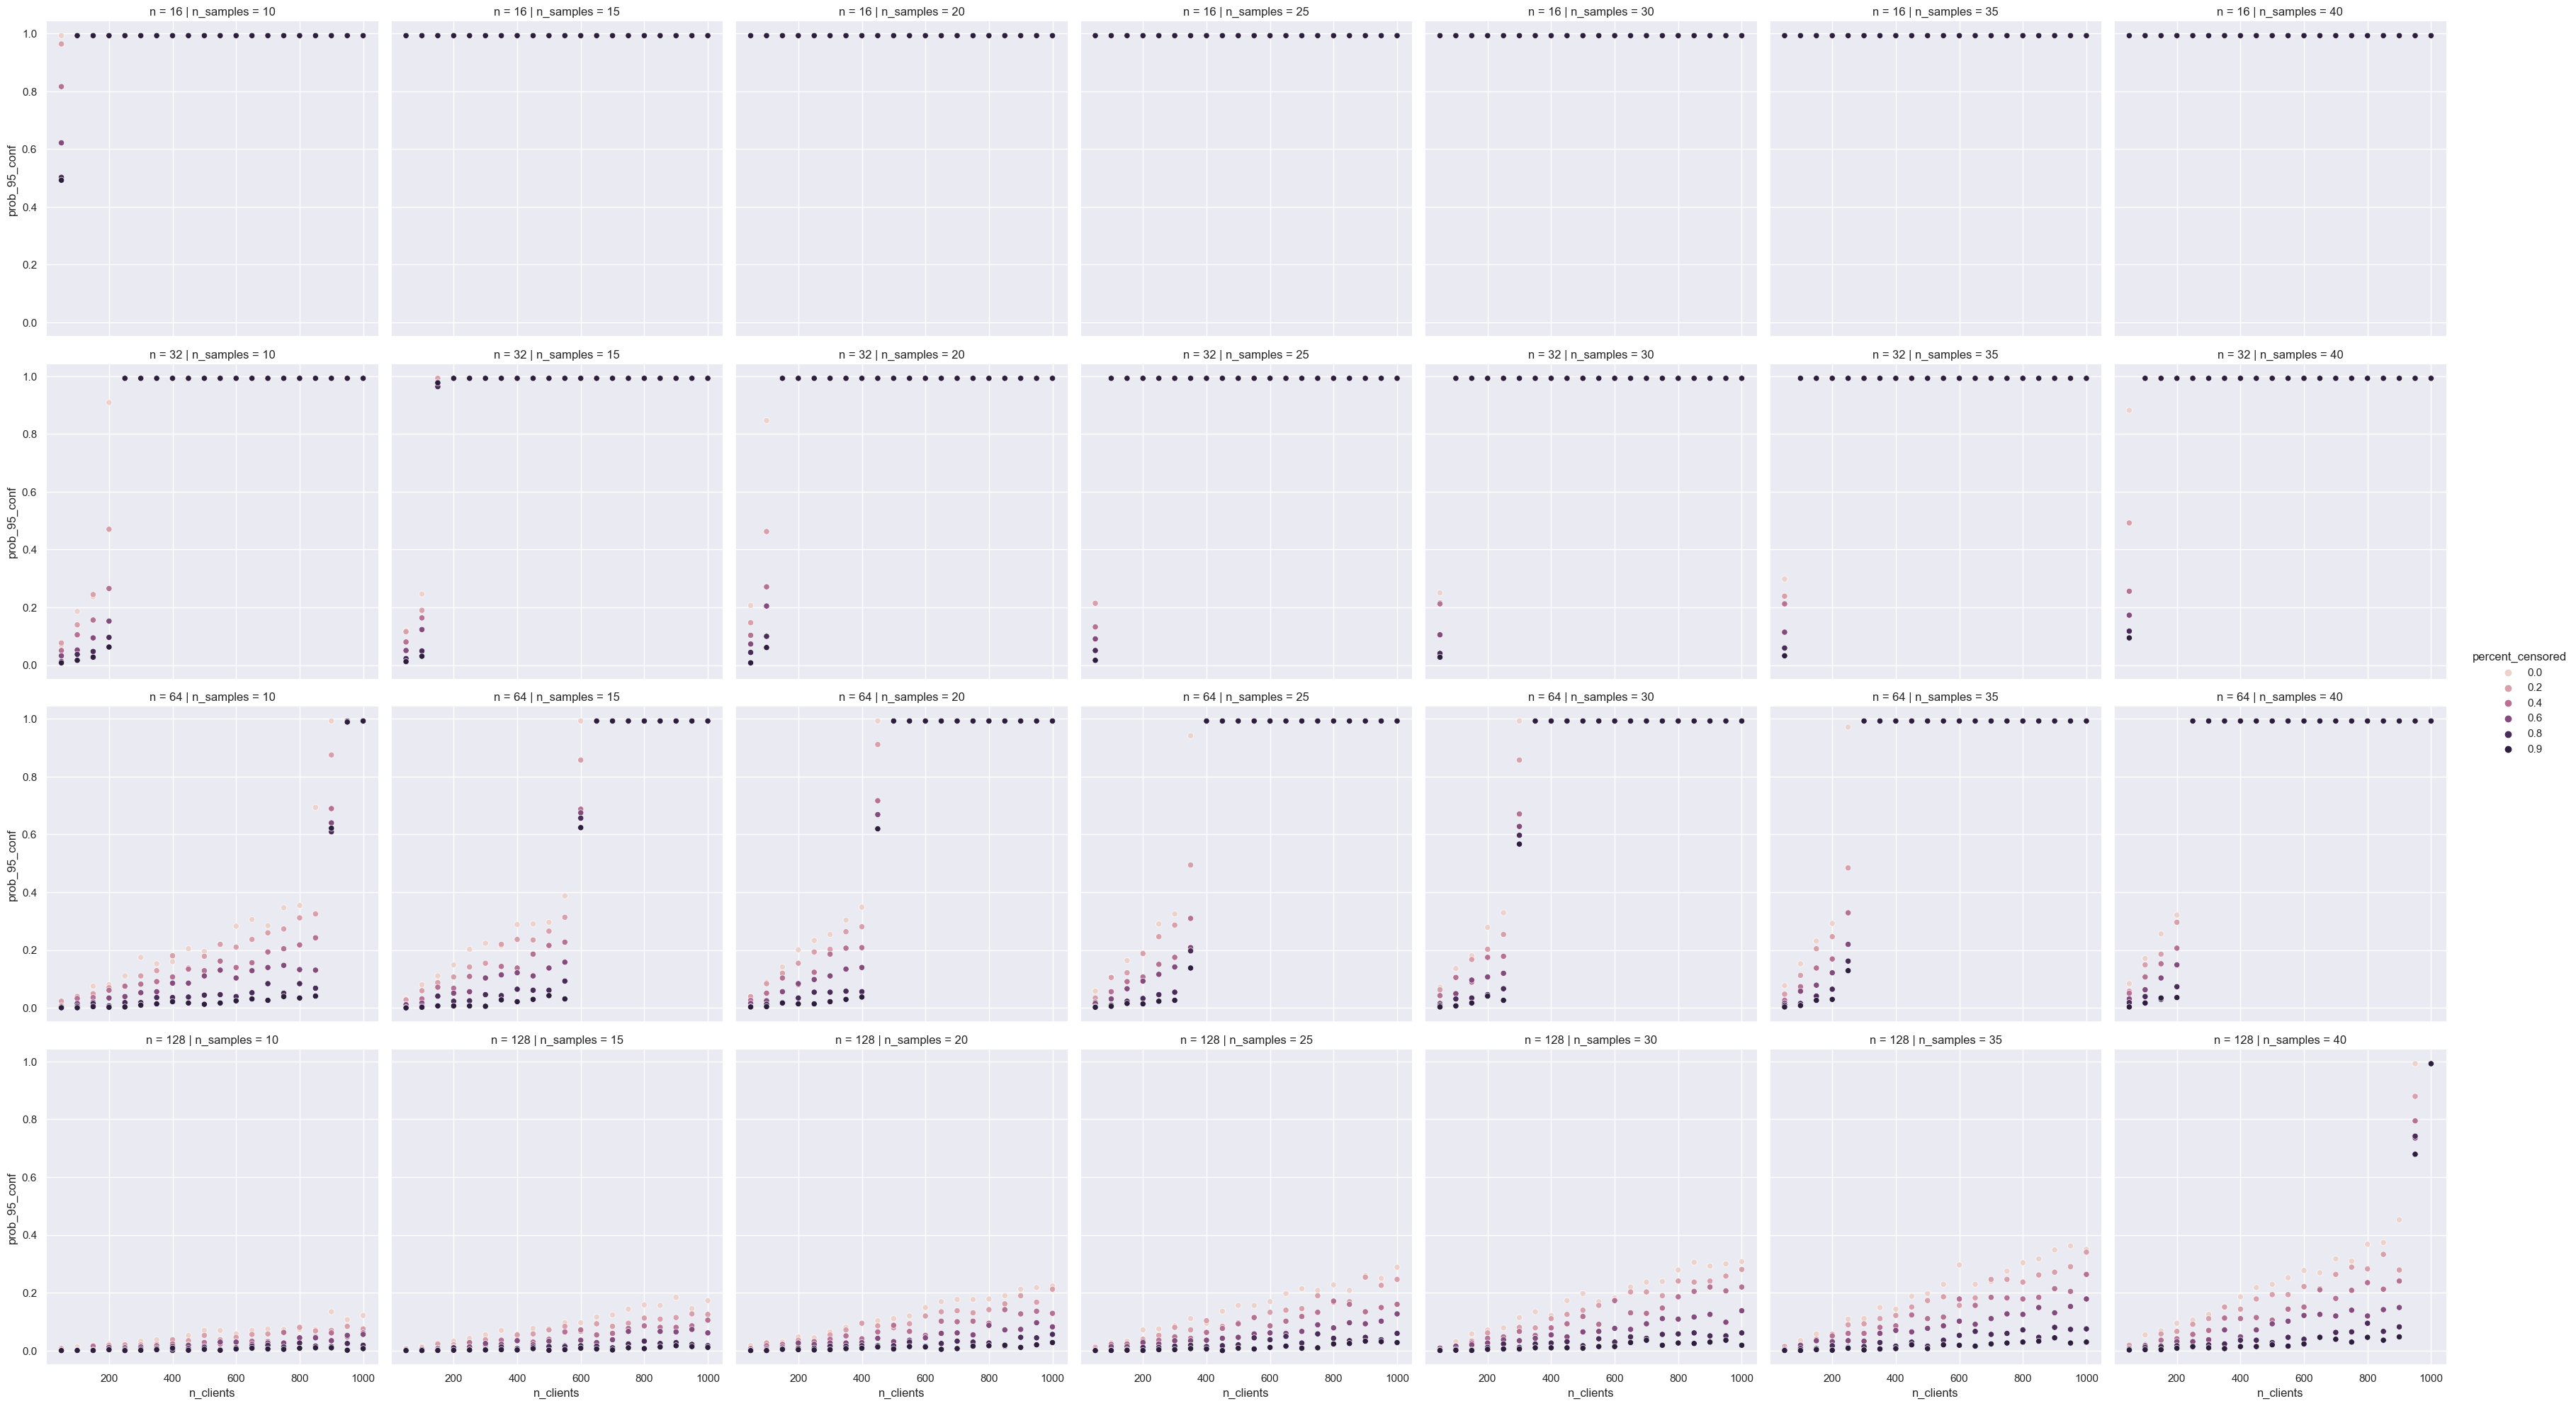

In [6]:
sns.relplot(data=df[df["dims"] == 2], x="n_clients", y="prob_95_conf", hue="percent_censored", col="n_samples", row="n")

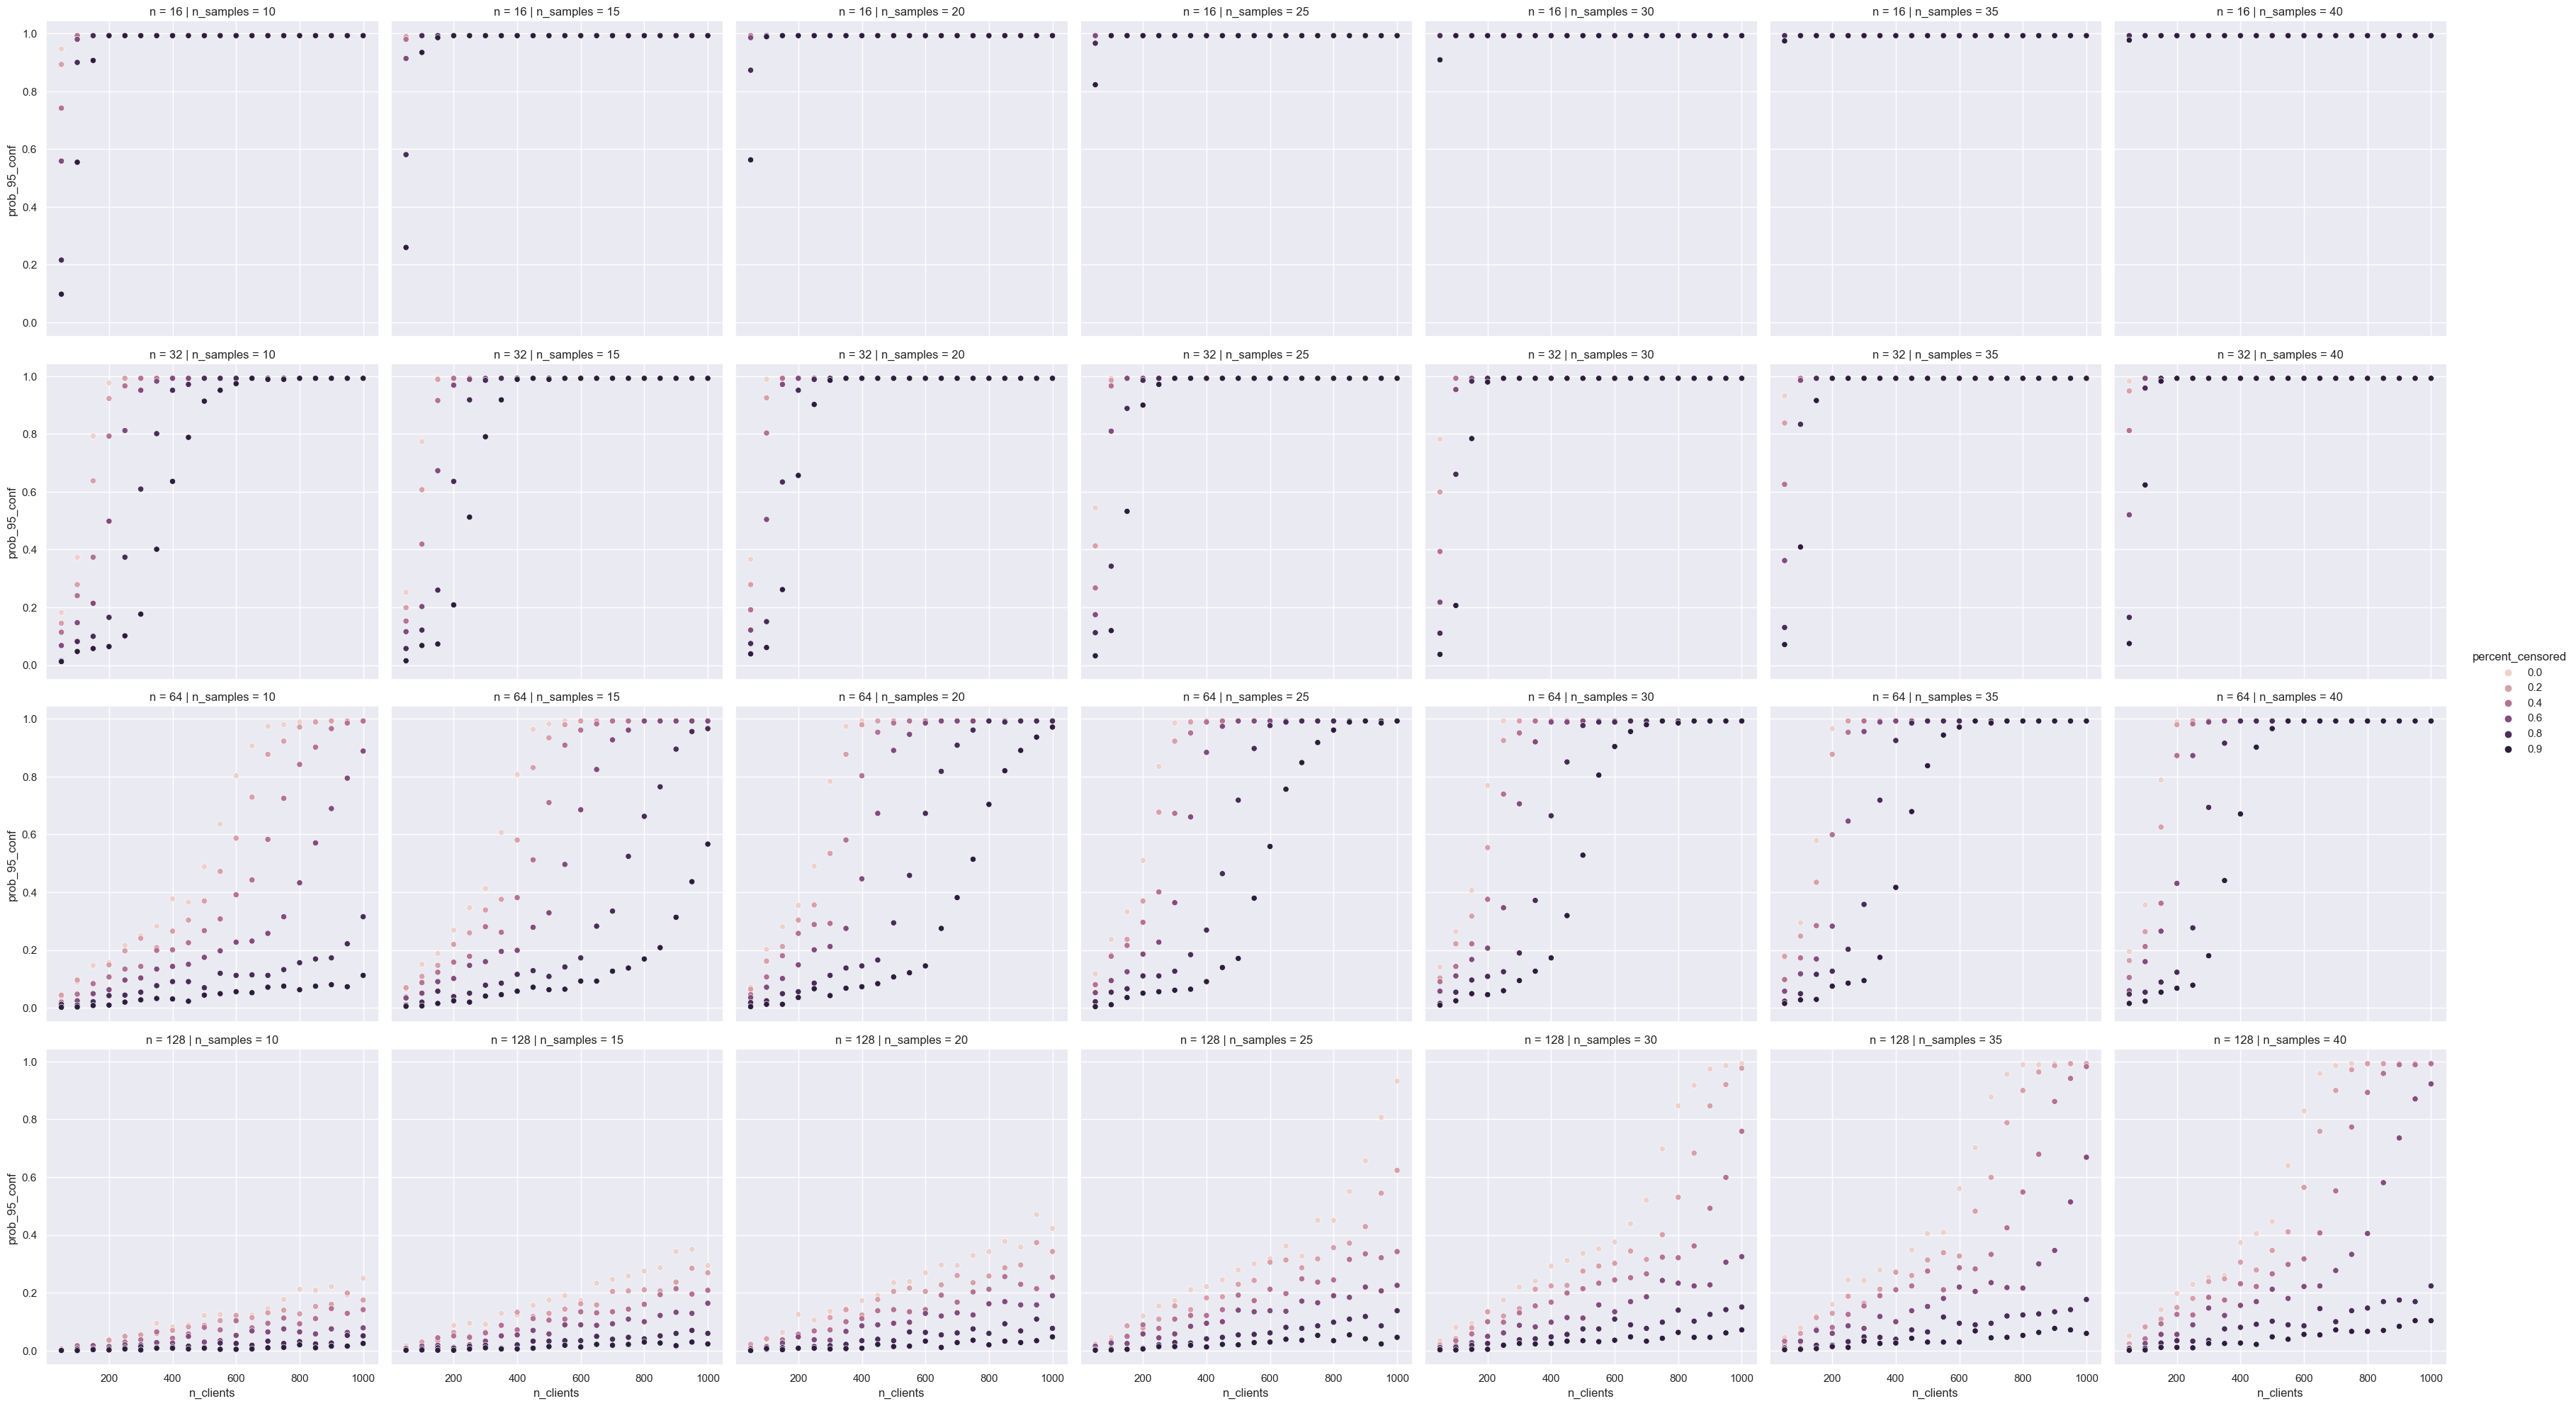

In [7]:
sns.relplot(data=df[df["dims"] == 1], x="n_clients", y="prob_95_conf", hue="percent_censored", col="n_samples", row="n")

In [8]:
import numpy as np
def ex(n, f):
    denom = n + 1 + np.arange(n).astype(float)
    return 2 * n**3 * (np.ones(n) / denom).sum()

Text(0, 0.5, 'E[X]')

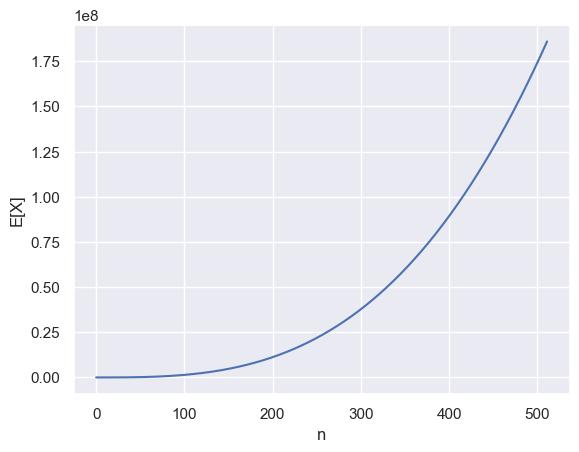

In [9]:
ys = [ex(n, 0) for n in range(1, 513)]
plt.plot(ys)
plt.xlabel("n")
plt.ylabel("E[X]")